<a href="https://colab.research.google.com/github/KSithole9/PremierLeague-Goal-Difference-Forecasting/blob/main/PremierLeagueGoalDifferenceForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load both Datasets**

In [ ]:
import pandas as pd

# Load the dataset
df_2020_2021 = pd.read_csv('2020-2021.csv')
df_2021_2022 = pd.read_csv('2021-2022.csv')

**Keep useful columns**

In [ ]:
columns_to_keep = ['HomeTeam', 'AwayTeam','FTHG', 'FTAG']
df_2020_2021 = df_2020_2021[columns_to_keep]
#data.to_csv('filtered_data.csv', index=False)
df_2020_2021

,HomeTeam,AwayTeam,FTHG,FTAG
0,Fulham,Arsenal,0,3
1,Crystal Palace,Southampton,1,0
2,Liverpool,Leeds,4,3
3,West Ham,Newcastle,0,2
4,West Brom,Leicester,0,3
...,...,...,...,...
375,Liverpool,Crystal Palace,2,0
376,Man City,Everton,5,0
377,Sheffield United,Burnley,1,0
378,West Ham,Southampton,3,0


In [ ]:
columns_to_keep = ['HomeTeam', 'AwayTeam','FTHG', 'FTAG']
df_2021_2022 = df_2021_2022[columns_to_keep]
#data.to_csv('filtered_data.csv', index=False)
df_2021_2022

,HomeTeam,AwayTeam,FTHG,FTAG
0,Brentford,Arsenal,2,0
1,Man United,Leeds,5,1
2,Burnley,Brighton,1,2
3,Chelsea,Crystal Palace,3,0
4,Everton,Southampton,3,1
...,...,...,...,...
375,Crystal Palace,Man United,1,0
376,Leicester,Southampton,4,1
377,Liverpool,Wolves,3,1
378,Man City,Aston Villa,3,2


**Season 1**

**List out all the teams and how many games they played as a home team**

In [ ]:
df_2020_2021["HomeTeam"].value_counts()

Fulham              19
Crystal Palace      19
Burnley             19
Wolves              19
Aston Villa         19
Leicester           19
Chelsea             19
Newcastle           19
Southampton         19
Arsenal             19
Man United          19
Leeds               19
Everton             19
Sheffield United    19
Brighton            19
Tottenham           19
West Brom           19
West Ham            19
Liverpool           19
Man City            19
Name: HomeTeam, dtype: int64

**Season 2**

**List out all the teams and how many games they played as a home team**

In [ ]:
df_2021_2022["HomeTeam"].value_counts()

Brentford         19
Man United        19
Arsenal           19
Wolves            19
Southampton       19
Brighton          19
Man City          19
Leeds             19
Crystal Palace    19
Aston Villa       19
Liverpool         19
Tottenham         19
Newcastle         19
Norwich           19
Watford           19
Leicester         19
Everton           19
Chelsea           19
Burnley           19
West Ham          19
Name: HomeTeam, dtype: int64

**List the teams that didn't play in both seasons**

In [ ]:
# Get unique teams for each season
teams_2020_2021 = set(df_2020_2021['HomeTeam'].unique())
teams_2021_2022 = set(df_2021_2022['HomeTeam'].unique())

# Find teams that exist in one dataset but not the other
teams_only_in_2020_2021 = teams_2020_2021 - teams_2021_2022
teams_only_in_2021_2022 = teams_2021_2022 - teams_2020_2021

# Print the results
print("Teams only in 2020-2021 dataset:", teams_only_in_2020_2021)
print("Teams only in 2021-2022 dataset:", teams_only_in_2021_2022)

Teams only in 2020-2021 dataset: {'Sheffield United', 'Fulham', 'West Brom'}
Teams only in 2021-2022 dataset: {'Brentford', 'Norwich', 'Watford'}


**Remove Teams that did not exist in both seasons from each dataset**

makes new .csv

In [ ]:
# Teams to remove
teams_to_remove_2020_2021 = ['West Brom', 'Sheffield United', 'Fulham']
teams_to_remove_2021_2022 = ['Norwich', 'Brentford', 'Watford']  # Replace with your team names

# Remove rows containing specified teams
df_2020_2021 = df_2020_2021[~df_2020_2021['HomeTeam'].isin(teams_to_remove_2020_2021) & ~df_2020_2021['AwayTeam'].isin(teams_to_remove_2020_2021)]
df_2021_2022 = df_2021_2022[~df_2021_2022['HomeTeam'].isin(teams_to_remove_2021_2022) & ~df_2021_2022['AwayTeam'].isin(teams_to_remove_2021_2022)]

# Save the updated datasets if needed
df_2020_2021.to_csv('removed_2020_2021.csv', index=False)
df_2021_2022.to_csv('removed_2021_2022.csv', index=False)

**Load new datasets**

In [ ]:
# Load the dataset
df_2020_2021 = pd.read_csv('removed_2020_2021.csv')
df_2021_2022 = pd.read_csv('removed_2021_2022.csv')
df_2020_2021

,HomeTeam,AwayTeam,FTHG,FTAG
0,Crystal Palace,Southampton,1,0
1,Liverpool,Leeds,4,3
2,West Ham,Newcastle,0,2
3,Tottenham,Everton,0,1
4,Brighton,Chelsea,1,3
...,...,...,...,...
267,Leicester,Tottenham,2,4
268,Liverpool,Crystal Palace,2,0
269,Man City,Everton,5,0
270,West Ham,Southampton,3,0


**Show that it removed the unwanted teams**

In [ ]:
df_2020_2021["HomeTeam"].value_counts()

Crystal Palace    16
Chelsea           16
Leeds             16
Everton           16
Man City          16
Burnley           16
Wolves            16
Leicester         16
Newcastle         16
Liverpool         16
Southampton       16
Arsenal           16
Man United        16
Brighton          16
Tottenham         16
West Ham          16
Aston Villa       16
Name: HomeTeam, dtype: int64

In [ ]:
df_2021_2022["HomeTeam"].value_counts()

Man United        16
Leeds             16
Brighton          16
Man City          16
West Ham          16
Arsenal           16
Wolves            16
Southampton       16
Aston Villa       16
Burnley           16
Liverpool         16
Tottenham         16
Newcastle         16
Leicester         16
Everton           16
Chelsea           16
Crystal Palace    16
Name: HomeTeam, dtype: int64

**Create Unique ID's for each team and make sure they are the same in both datasets**

In [ ]:
# Combine unique teams from both seasons
all_teams = set(df_2020_2021['HomeTeam'].unique()) | set(df_2021_2022['HomeTeam'].unique())

# Create a dictionary mapping teams to unique IDs
team_id_mapping = {team: i+1 for i, team in enumerate(all_teams)}

# Create 'HomeID' and 'AwayID' columns in both datasets
df_2020_2021['HomeID'] = df_2020_2021['HomeTeam'].map(team_id_mapping)
df_2020_2021['AwayID'] = df_2020_2021['AwayTeam'].map(team_id_mapping)

df_2021_2022['HomeID'] = df_2021_2022['HomeTeam'].map(team_id_mapping)
df_2021_2022['AwayID'] = df_2021_2022['AwayTeam'].map(team_id_mapping)

# Save the updated datasets if needed
df_2020_2021.to_csv('updated_2020_2021_dataset.csv', index=False)
df_2021_2022.to_csv('updated_2021_2022_dataset.csv', index=False)

In [ ]:
df_2020_2021

,HomeTeam,AwayTeam,FTHG,FTAG,HomeID,AwayID
0,Crystal Palace,Southampton,1,0,6,2
1,Liverpool,Leeds,4,3,8,4
2,West Ham,Newcastle,0,2,14,10
3,Tottenham,Everton,0,1,7,12
4,Brighton,Chelsea,1,3,5,9
...,...,...,...,...,...,...
267,Leicester,Tottenham,2,4,3,7
268,Liverpool,Crystal Palace,2,0,8,6
269,Man City,Everton,5,0,16,12
270,West Ham,Southampton,3,0,14,2


In [ ]:
df_2021_2022

,HomeTeam,AwayTeam,FTHG,FTAG,HomeID,AwayID
0,Man United,Leeds,5,1,11,4
1,Burnley,Brighton,1,2,13,5
2,Chelsea,Crystal Palace,3,0,9,6
3,Everton,Southampton,3,1,12,2
4,Leicester,Wolves,1,0,3,1
...,...,...,...,...,...,...
267,Burnley,Newcastle,1,2,13,10
268,Crystal Palace,Man United,1,0,6,11
269,Leicester,Southampton,4,1,3,2
270,Liverpool,Wolves,3,1,8,1


**Make new column for the Goal Difference for each game**

In [ ]:
df_2020_2021['GoalDif'] = df_2020_2021['FTHG'] - df_2020_2021['FTAG']
df_2021_2022['GoalDif'] = df_2021_2022['FTHG'] - df_2021_2022['FTAG']
df_2020_2021

,HomeTeam,AwayTeam,FTHG,FTAG,HomeID,AwayID,GoalDif
0,Crystal Palace,Southampton,1,0,6,2,1
1,Liverpool,Leeds,4,3,8,4,1
2,West Ham,Newcastle,0,2,14,10,-2
3,Tottenham,Everton,0,1,7,12,-1
4,Brighton,Chelsea,1,3,5,9,-2
...,...,...,...,...,...,...,...
267,Leicester,Tottenham,2,4,3,7,-2
268,Liverpool,Crystal Palace,2,0,8,6,2
269,Man City,Everton,5,0,16,12,5
270,West Ham,Southampton,3,0,14,2,3


In [ ]:
df_2021_2022

,HomeTeam,AwayTeam,FTHG,FTAG,HomeID,AwayID,GoalDif
0,Man United,Leeds,5,1,11,4,4
1,Burnley,Brighton,1,2,13,5,-1
2,Chelsea,Crystal Palace,3,0,9,6,3
3,Everton,Southampton,3,1,12,2,2
4,Leicester,Wolves,1,0,3,1,1
...,...,...,...,...,...,...,...
267,Burnley,Newcastle,1,2,13,10,-1
268,Crystal Palace,Man United,1,0,6,11,1
269,Leicester,Southampton,4,1,3,2,3
270,Liverpool,Wolves,3,1,8,1,2


**Training and Testing sets**

In [ ]:
# Training Set (Season 1 - 2020-2021)
X_train = df_2020_2021[['HomeID', 'AwayID']]
y_train = df_2020_2021['GoalDif']

# Testing Set (Season 2 - 2021-2022)
X_test = df_2021_2022[['HomeID', 'AwayID']]
y_test = df_2021_2022['GoalDif']

**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.460426470588236


**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.419117647058823


**SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Support Vector Machine Regressor
svm_model = SVR(kernel='linear')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.8842243879624125


**LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lin_model = LinearRegression()

# Train the model on the training set
lin_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.824784426097428


In [ ]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df
predictions_df.to_csv('predictions.csv', index=False)

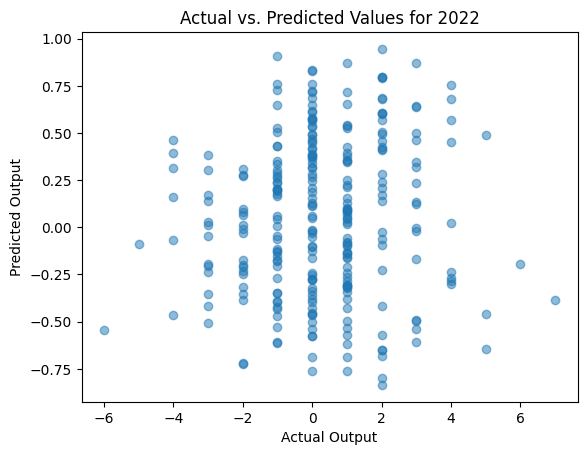

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values for 2022')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

**Making pkl file with our LinearRegression Model**

In [ ]:
import pickle

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lin_model, file)


**Displays all Teams and their cooresponding IDs**

In [ ]:
# Create a DataFrame with unique IDs and corresponding HomeTeam names
unique_ids_and_teams = df_2020_2021[['HomeID', 'HomeTeam']].drop_duplicates()

# Sort the DataFrame by ID in descending order
unique_ids_and_teams = unique_ids_and_teams.sort_values(by='HomeID', ascending=True)

# Display the result
print(unique_ids_and_teams)

    HomeID        HomeTeam
20       1         Everton
2        2        West Ham
6        3         Arsenal
21       4           Leeds
9        5         Chelsea
1        6       Liverpool
5        7      Man United
25       8     Aston Villa
10       9       Leicester
11      10          Wolves
16      11        Man City
3       12       Tottenham
0       13  Crystal Palace
4       14        Brighton
14      15         Burnley
8       16       Newcastle
7       17     Southampton


**Loads pkl file Model and allows the user to choose the HomeTeam and AwayTeam and get the result**

In [ ]:
# Load the model from the file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_lin_model = pickle.load(file)

HomeID = int(input("Enter Home Team ID: "))
AwayID = int(input("Enter Away Team ID: "))

# Create a DataFrame with the new data (HomeID=1, AwayID=2)
new_data = pd.DataFrame({'HomeID': [HomeID], 'AwayID': [AwayID]})

# Make predictions using the loaded model
predicted_goal_dif = loaded_lin_model.predict(new_data)
predicted_goal_dif = predicted_goal_dif
# Print the predicted goal ratio
print(f'Predicted Goal Difference: {predicted_goal_dif[0]}')

if predicted_goal_dif > 0:
  print("Home team is likely to Win")
else:
  print("Away team is likely to Win")



Enter Home Team ID: 4
Enter Away Team ID: 7
Predicted Goal Difference: 0.09971645520953476
Home team is likely to Win
